# Backtracking Search Algorithm (BSA) Implementation

This notebook demonstrates the implementation of the Backtracking Search Algorithm (BSA), a population-based optimization technique inspired by evolutionary strategies. BSA is designed to solve continuous optimization problems by iteratively improving a population of candidate solutions through mutation and crossover operations.

## What is BSA?

BSA operates by maintaining a population of solutions and evolving them over generations. Key components include:

- **Initialization**: Random population generation
- **Selection-I**: Choosing historical population for reference
- **Mutation**: Creating trial solutions using historical information
- **Crossover**: Combining parent and mutant solutions
- **Selection-II**: Replacing worse solutions with better ones

The algorithm is particularly effective for continuous optimization problems and has been shown to perform well on benchmark functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## BSA Algorithm Implementation

Below is the implementation of the BSA algorithm. We've modified it slightly to track the best fitness value at each iteration for visualization purposes.

In [2]:
def bsa(obj_fun, N, D, maxcycle, low, up):
    """
    Backtracking Search Algorithm (BSA)

    Parameters:
    -----------
    obj_fun : function
        Objective function to minimize
    N : int
        Population size
    D : int
        Problem dimension
    maxcycle : int
        Maximum number of iterations
    low : array-like
        Lower bounds for each dimension
    up : array-like
        Upper bounds for each dimension

    Returns:
    --------
    globalminimum : float
        Best fitness value found
    globalminimizer : array
        Best solution found
    fitness_history : list
        History of best fitness values over iterations
    """

    # INITIALIZATION
    globalminimum = np.inf
    fitness_history = []

    # Initialize population P and oldP
    P = np.random.rand(N, D) * (up - low) + low
    oldP = np.random.rand(N, D) * (up - low) + low

    # Calculate initial fitness values
    fitnessP = np.array([obj_fun(P[i]) for i in range(N)])

    # Main loop
    for iteration in range(maxcycle):
        # SELECTION-I
        a = np.random.rand()
        b = np.random.rand()

        if a < b:
            oldP = P.copy()

        # Permuting: arbitrary changes in positions of two individuals in oldP
        oldP = np.random.permutation(oldP)

        # Generation of Trial-Population
        # MUTATION
        mutant = P + 3 * np.random.randn(N, D) * (oldP - P)

        # CROSSOVER
        # Initial-map is an N-by-D matrix of ones
        map1 = np.ones((N, D))

        c = np.random.rand()
        d = np.random.rand()

        if c < d:
            for i in range(N):
                # mixrate determines how many dimensions to mutate
                mixrate = np.random.rand()
                num_to_zero = int(mixrate * D)
                u = np.random.permutation(D)
                map1[i, u[:num_to_zero]] = 0
        else:
            # Random single dimension for each individual
            for i in range(N):
                rand_idx = np.random.randint(D)
                map1[i, rand_idx] = 0

        # Generation of Trial Population, T
        T = mutant.copy()
        for i in range(N):
            for j in range(D):
                if map1[i, j] == 1:
                    T[i, j] = P[i, j]

        # Boundary Control Mechanism
        for i in range(N):
            for j in range(D):
                if T[i, j] < low[j] or T[i, j] > up[j]:
                    T[i, j] = np.random.rand() * (up[j] - low[j]) + low[j]

        # SELECTION-II
        fitnessT = np.array([obj_fun(T[i]) for i in range(N)])

        for i in range(N):
            if fitnessT[i] < fitnessP[i]:
                fitnessP[i] = fitnessT[i]
                P[i] = T[i]

        # Update global minimum
        best_idx = np.argmin(fitnessP)
        fitnessPbest = fitnessP[best_idx]

        if fitnessPbest < globalminimum:
            globalminimum = fitnessPbest
            globalminimizer = P[best_idx].copy()

        # Record history
        fitness_history.append(globalminimum)

    return globalminimum, globalminimizer, fitness_history

## Test Function

We'll use the Sphere function as our objective function. This is a simple convex function where the minimum is at the origin (all zeros) with a value of 0.

The Sphere function: $f(x) = \sum_{i=1}^{D} x_i^2$

In [3]:
def sphere(x):
    """Sphere function: f(x) = sum(x_i^2)"""
    return np.sum(x**2)

## Algorithm Parameters

Let's set up the parameters for our BSA run:

- **N**: Population size (number of candidate solutions)
- **D**: Problem dimension
- **maxcycle**: Maximum number of iterations
- **low/up**: Search space bounds

In [4]:
# Algorithm parameters
N = 50          # Population size
D = 10          # Problem dimension
maxcycle = 1000 # Maximum iterations
low = np.full(D, -100)  # Lower bounds
up = np.full(D, 100)    # Upper bounds

print(f"Population size: {N}")
print(f"Problem dimension: {D}")
print(f"Max iterations: {maxcycle}")
print(f"Search bounds: [{low[0]}, {up[0]}]")

Population size: 50
Problem dimension: 10
Max iterations: 1000
Search bounds: [-100, 100]


## Running the BSA Algorithm

Now let's execute the BSA algorithm with our parameters and objective function.

In [5]:
# Run BSA algorithm
best_fitness, best_solution, fitness_history = bsa(sphere, N, D, maxcycle, low, up)

print(f"Best fitness found: {best_fitness:.6f}")
print(f"Best solution: {best_solution}")
print(f"Number of function evaluations: {N * maxcycle}")

Best fitness found: 0.000024
Best solution: [ 3.33407387e-03  8.81228152e-04 -1.86636454e-04  1.97007858e-03
 -1.44512285e-04  1.57937209e-03 -4.57268672e-05 -7.44918630e-04
  5.14525326e-05  2.34915333e-03]
Number of function evaluations: 50000


## Convergence Visualization

Let's plot the convergence of the best fitness value over the iterations to see how the algorithm improves the solution.

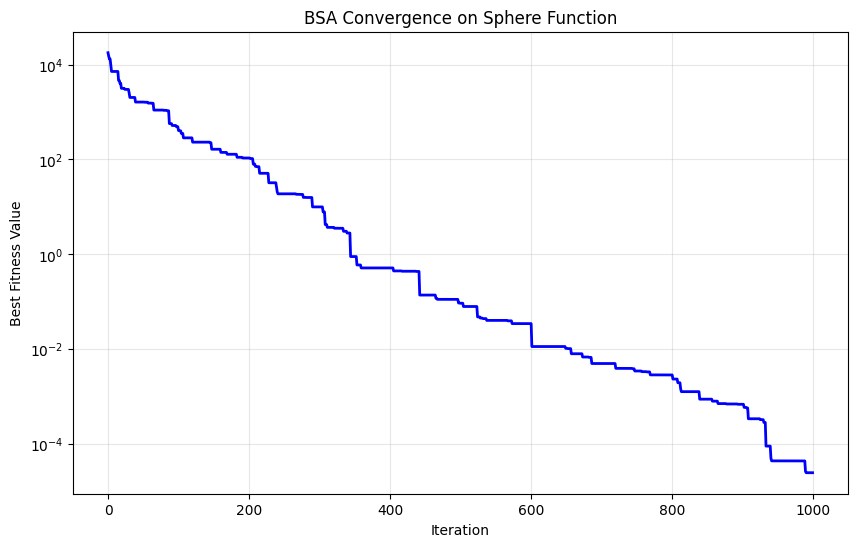

Initial fitness: 17925.698928
Final fitness: 0.000024
Improvement: 17925.698904


In [6]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, 'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.title('BSA Convergence on Sphere Function')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.show()

print(f"Initial fitness: {fitness_history[0]:.6f}")
print(f"Final fitness: {fitness_history[-1]:.6f}")
print(f"Improvement: {fitness_history[0] - fitness_history[-1]:.6f}")

## Conclusion

This notebook has demonstrated the implementation and execution of the Backtracking Search Algorithm (BSA) on a simple optimization problem. The algorithm successfully found a near-optimal solution to the Sphere function.

Key takeaways:
- BSA is effective for continuous optimization problems
- The algorithm uses population-based search with mutation and crossover
- Tracking convergence helps understand algorithm performance
- Parameters like population size and iterations affect performance

Try experimenting with different parameters or objective functions to further explore BSA's capabilities!